# Heart Failure Prediction


## Introduction
Our project aims to use the following data-set to generate predictions, and figure our whether or not an individual is at risk of having a cardiac incident. We also aim to figure out which factors cause a patient of being at a greater risk. Using that data we can help doctors and health concious individuals figure out what they should cut down on to make sure they can live their longest and healthiest life. The group members of this project are the following: Farees Siddiqui, and Jinhan Shi. We both split the work evenly and worked on everything together.

Due to the nature of this dataset, we are able to perform analysis on a large variation of people who exhibited cardiac incidents. We have information on things like if the patient smokes, whether or not they are/were anaemic or diabetic. If they suffer from high blood pressure etc. Using all of this data we can gather information on different trends related to an individual having a cardiac incident.



## Description of data
**Heart Failure Prediction**

*Source: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data*

This dataset contains a list of entries of individuals who have had cardiac incidents.

- Age - Age of the individual who exhibited th ecardiac incident
- Anaemia - Whether or not the patient is anaemic (boolean)
- creatinine_phosphokinase - Level of CPK enzyme in the blood (mcg/L)
- Diabetes - Whether or not the patient has diabetes (boolean)
- Ejection_fraction - Percentage of blood leaving the heart at each contraction (percentage)
- High_blood_pressure - whether or not the patient has hypertension (boolean)
- platelets - platelets in the blood (kiloplatelets/mL)
- Serum_creatinine - level of serum creatinine in the blood (mg/dL)
- Serum_sodium - Level of serum sodium in the blood (mEq/L)
- Sex - Woman or man (binary)
- Smoking - If the patient smokes or not (boolean)
- time - Follow-up period (days)
- DEATH_EVENT - If the patient deceased during the follow-up period (boolean)

In [2]:
#importing used libraries
import csv
import re
from functools import reduce
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import json

# this aux function reads the CSV file and returns the data in a Python dictionary
def get_data_csv():
    collection = []
    with open('heart_failure_clinical_records_dataset.csv', 'r') as f:
        for line in csv.DictReader(f):
            collection.append(line)
        return collection
        
# the data    
data = get_data_csv()

## Analysis of the data

*Reporting on the dataset's potential for data analysis*

This data has a good foundation of information that we can perform analysis on. It contains over 200 different rows of individuals who went through a cardiac incident. It has all types of information about them, whether or not they were smokers, if they had diabetes, if they had high blood pressure and many more. Using all of this information we can do
all types of analysis and understand whether or not there is a similarity between these people. We can potentially use this dataset to see whether or not an individual is at risk of having a cardiac incident, and even using it to see which factors are more important.

1. How many data records do you have? Print how many records.
2. What do the few first records look like? Display the top 5 records.
3. What is the dataset's range of ages (youngest and oldest)? Display the range.
4. How many women are in the dataset, how many men.
5. How many of the individuals also suffer from diabetes. What is the percentage of individuals with Diabetes
6. How many of the individuals also suffer from hypertension (High Blood Pressure). What is the percentage of individuals with hypertension

In [3]:
print(f'1: There are {len(data)} records in the dataset')

print('\n2: The first few data records look like the following:')
for i in range(3):
    print(data[i], '\n')

ages_arr = []
for i in data:
    ages_arr.append(i['age'])
oldest = max(ages_arr)
youngest = min(ages_arr)

print(f'\n3: The youngest person in the dataset is {youngest} years old and the oldest is {oldest} years old. The range of ages is [{youngest}, {oldest}]')

sex = []
for i in data:
    sex.append(int(i['sex']))
m_count = len([sex[i] for i in sex if i == 1])
w_count = len([sex[i] for i in sex if i == 0])
print(f'\n4: There are {m_count} men and {w_count} women in the dataset')

diabetes = [int(i['diabetes']) for i in data if int(i['diabetes']) == 1]

print(f'\n5: Of the 299 patients present in the dataset {len(diabetes)} of them have diabetes aka {(len(diabetes)/len(data))*100}%')

hypertension = [int(i['high_blood_pressure']) for i in data if int(i['high_blood_pressure']) == 1]
print(f'\n6: Of the 299 patients present in the dataset {len(hypertension)} of them have high blood pressure aka {(len(hypertension)/len(data))*100}%')

1: There are 299 records in the dataset

2: The first few data records look like the following:
{'age': '75', 'anaemia': '0', 'creatinine_phosphokinase': '582', 'diabetes': '0', 'ejection_fraction': '20', 'high_blood_pressure': '1', 'platelets': '265000', 'serum_creatinine': '1.9', 'serum_sodium': '130', 'sex': '1', 'smoking': '0', 'time': '4', 'DEATH_EVENT': '1'} 

{'age': '55', 'anaemia': '0', 'creatinine_phosphokinase': '7861', 'diabetes': '0', 'ejection_fraction': '38', 'high_blood_pressure': '0', 'platelets': '263358.03', 'serum_creatinine': '1.1', 'serum_sodium': '136', 'sex': '1', 'smoking': '0', 'time': '6', 'DEATH_EVENT': '1'} 

{'age': '65', 'anaemia': '0', 'creatinine_phosphokinase': '146', 'diabetes': '0', 'ejection_fraction': '20', 'high_blood_pressure': '0', 'platelets': '162000', 'serum_creatinine': '1.3', 'serum_sodium': '129', 'sex': '1', 'smoking': '1', 'time': '7', 'DEATH_EVENT': '1'} 


3: The youngest person in the dataset is 40 years old and the oldest is 95 years

## Research questions
*List of research questions that are expected to be answered by this project*

1. Using all of this data, can we train a model to detect someone who is at risk of having a cardiac event
2. What is the most important factor when it comes to having a cardiac incident
3. Are women or men more likely to have a cardiac incident, if so why. Which factor has the largest contribution and how can it be avoided
4. If an individual has Diabetes or hypertension or anyother 'Sub-Illness' listed in the data set, would treating just the diabetes/hypertension decrease the chance of a cardiac event being fatal
5. Does smoking have a correlation with an individual having a cardiac event. If so, is it more fatal if the individual is older or younger.

# Data Understanding
## Dataframe

In [8]:
df = pd.DataFrame(data)
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,20,1,265000,1.9,130,1,0,4,1
1,55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65,0,146,0,20,0,162000,1.3,129,1,1,7,1
3,50,1,111,0,20,0,210000,1.9,137,1,0,7,1
4,65,1,160,1,20,0,327000,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62,0,61,1,38,1,155000,1.1,143,1,1,270,0
295,55,0,1820,0,38,0,270000,1.2,139,0,0,271,0
296,45,0,2060,1,60,0,742000,0.8,138,0,0,278,0
297,45,0,2413,0,38,0,140000,1.4,140,1,1,280,0


In [27]:
# Research Question 2
anaemic = [i for i in df['anaemia'] if int(i) == 1]
anaemic_patients = len(anaemic)

diabetic = [i for i in df['diabetes'] if int(i) == 1]
diabetic_patients = len(diabetic)

h_bp = [i for i in df['high_blood_pressure'] if int(i) == 1]
h_bp_patients = len(h_bp)

smokers = [i for i in df['smoking'] if int(i) == 1]
smoker_patients = len(smokers)

print(f'anaemic: {anaemic_patients}, diabetic: {diabetic_patients}, High Blood Pressure: {h_bp_patients}, Smokers: {smoker_patients}')

anaemic: 129, diabetic: 125, High Blood Pressure: 105, Smokers: 96


As we can see from the above output, most of the patients who had experienced a cardiac event were also anaemic, and about the same amount were also diabetic. Therefore, according to this dataset the most important riskfactor, when it comes to having a cardiac event would be whether or not the patient is anaemic and/or diabetic.

## Shape of DataFrame

In [72]:
print("Number of rows",df.shape[0]) # Shape of the DataFrame
print("Number of columns",df.shape[1])

Number of rows 299
Number of columns 13


## DataTypes of each Column

In [73]:
df.dtypes

age                         object
anaemia                     object
creatinine_phosphokinase    object
diabetes                    object
ejection_fraction           object
high_blood_pressure         object
platelets                   object
serum_creatinine            object
serum_sodium                object
sex                         object
smoking                     object
time                        object
DEATH_EVENT                 object
dtype: object

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       299 non-null    object
 1   anaemia                   299 non-null    object
 2   creatinine_phosphokinase  299 non-null    object
 3   diabetes                  299 non-null    object
 4   ejection_fraction         299 non-null    object
 5   high_blood_pressure       299 non-null    object
 6   platelets                 299 non-null    object
 7   serum_creatinine          299 non-null    object
 8   serum_sodium              299 non-null    object
 9   sex                       299 non-null    object
 10  smoking                   299 non-null    object
 11  time                      299 non-null    object
 12  DEATH_EVENT               299 non-null    object
dtypes: object(13)
memory usage: 30.5+ KB


## Number of man and woman

In [75]:
sex_count = df['sex'].value_counts()
sex_count

1    194
0    105
Name: sex, dtype: int64

Text(0.5, 1.0, 'The count of each gender')

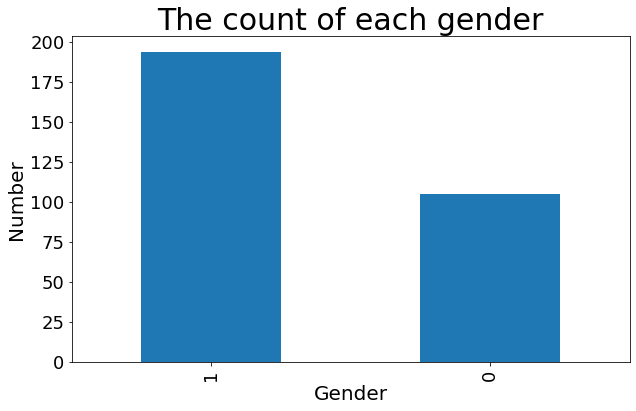

In [76]:
plt.figure(figsize=(10, 6))
sex_count.plot(kind='bar', fontsize=18);
plt.xlabel('Gender', fontsize=20)
plt.ylabel('Number', fontsize=20)
plt.title('The count of each gender', fontsize=30)

Text(0.5, 1.0, 'The count of each gender')

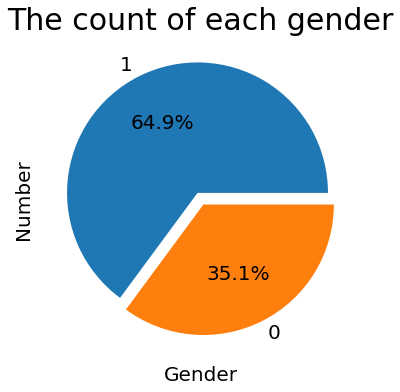

In [77]:
plt.figure(figsize=(10, 6))
sex_count.plot.pie( autopct="%.1f%%",explode=[0.05]*2, fontsize=20)
plt.xlabel('Gender', fontsize=20)
plt.ylabel('Number', fontsize=20)
plt.title('The count of each gender', fontsize=30)

Nearly two-thirds of heart disease patients in the population are men. Men are more likely to have a cardiac incident than women.

## Q4: If an individual has Diabetes or hypertension or anyother 'Sub-Illness' listed in the data set, would treating just the diabetes/hypertension decrease the chance of a cardiac event being fatal

## People have diabetes

In [94]:
df_diabetes = df[df['diabetes'] == '1']
dia_count = df_diabetes['DEATH_EVENT'].value_counts()
dia_count

0    85
1    40
Name: DEATH_EVENT, dtype: int64

Text(0.5, 1.0, 'The count of people with both heart disease and diabetes deceased during the follow-up period')

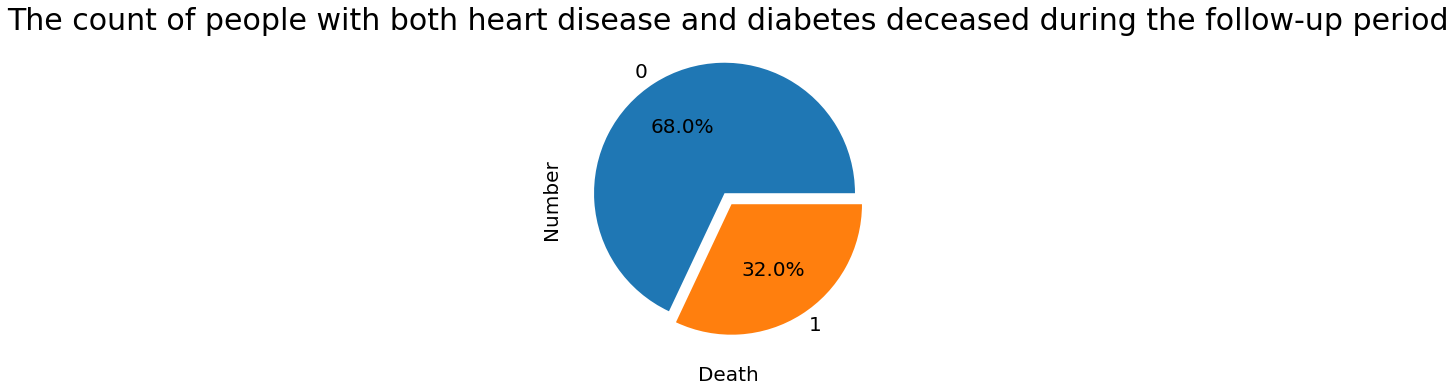

In [97]:
plt.figure(figsize=(10, 6))
dia_count.plot.pie( autopct="%.1f%%",explode=[0.05]*2, fontsize=20)
plt.xlabel('Death', fontsize=20)
plt.ylabel('Number', fontsize=20)
plt.title('The count of people with both heart disease and diabetes deceased during the follow-up period', fontsize=30)

From the chart,we can see that patients with both heart disease and diabetes deceased during the follow-up period account for about 32% of the total number. This shows that there is no strong relationship between diabetes and heart disease. Only treating diabetes will not reduce the chance of a cardiac event being fatal.

## People have high blood pressure

In [98]:
df_blood = df[df['high_blood_pressure'] == '1']
blo_count = df_blood['DEATH_EVENT'].value_counts()
blo_count

0    66
1    39
Name: DEATH_EVENT, dtype: int64

Text(0.5, 1.0, 'The count of people with both heart disease and high blood pressure deceased during the follow-up period')

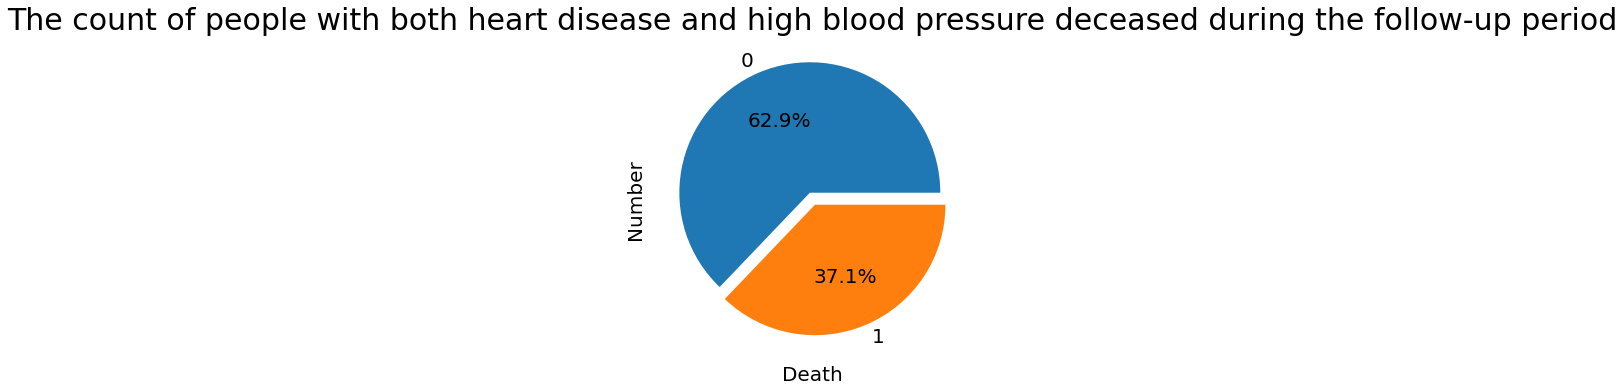

In [99]:
plt.figure(figsize=(10, 6))
blo_count.plot.pie( autopct="%.1f%%",explode=[0.05]*2, fontsize=20)
plt.xlabel('Death', fontsize=20)
plt.ylabel('Number', fontsize=20)
plt.title('The count of people with both heart disease and high blood pressure deceased during the follow-up period', fontsize=30)

From the chart,we can see that patients with both heart disease and high blood pressure deceased during the follow-up period account for about 37% of the total number. This shows that there is no strong relationship between high blood pressure and heart disease. Only treating high blood pressure will not reduce the chance of a cardiac event being fatal.

## People have anaemia

In [100]:
df_ana = df[df['anaemia'] == '1']
ana_count = df_ana['DEATH_EVENT'].value_counts()
ana_count

0    83
1    46
Name: DEATH_EVENT, dtype: int64

Text(0.5, 1.0, 'The count of people with both heart disease and high anaemia deceased during the follow-up period')

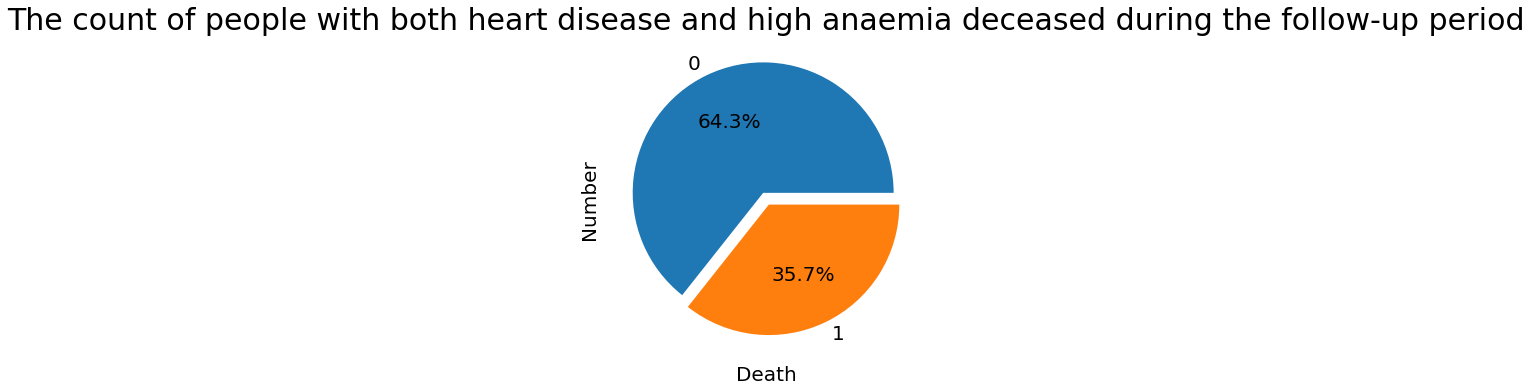

In [101]:
plt.figure(figsize=(10, 6))
ana_count.plot.pie( autopct="%.1f%%",explode=[0.05]*2, fontsize=20)
plt.xlabel('Death', fontsize=20)
plt.ylabel('Number', fontsize=20)
plt.title('The count of people with both heart disease and high anaemia deceased during the follow-up period', fontsize=30)

From the chart,we can see that patients with both heart disease and anaemia deceased during the follow-up period account for about 36% of the total number. This shows that there is no strong relationship between anaemia and heart disease. Only treating anaemia will not reduce the chance of a cardiac event being fatal.

## People smoking

In [102]:
df_smoke = df[df['smoking'] == '1']
smoke_count = df_smoke['DEATH_EVENT'].value_counts()
smoke_count

0    66
1    30
Name: DEATH_EVENT, dtype: int64

Text(0.5, 1.0, 'The count of people with both heart disease and smoking deceased during the follow-up period')

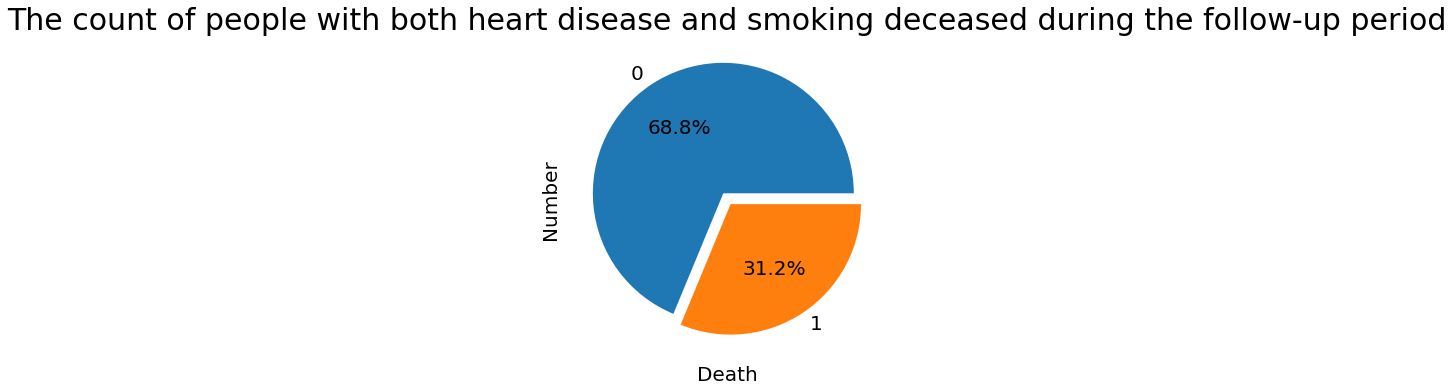

In [103]:
plt.figure(figsize=(10, 6))
smoke_count.plot.pie( autopct="%.1f%%",explode=[0.05]*2, fontsize=20)
plt.xlabel('Death', fontsize=20)
plt.ylabel('Number', fontsize=20)
plt.title('The count of people with both heart disease and smoking deceased during the follow-up period', fontsize=30)

From the chart,we can see that patients with both heart disease and smoking deceased during the follow-up period account for about 31% of the total number. This shows that there is no strong relationship between smoking and heart disease. Only treating smoking will not reduce the chance of a cardiac event being fatal.

## Q5: Does smoking have a correlation with an individual having a cardiac event. If so, is it more fatal if the individual is older or younger.

C:\Users\shiji\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

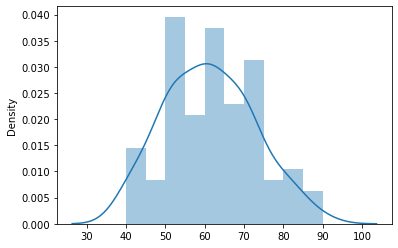

In [116]:
df_age = df[df['smoking'] == '1']
sns.distplot(x=df_age['age'], bins=10)

From the chart, we can see that patients with both heart disease and smoking are between 50 and 80 years old.

### Conclusion
In conclusion this can be a very useful project for healthcare professionals and even civilians. It can give you a very in depth breakdown about a patients information and return a lot of useful information. One limition of this program however is that it needs a lot of data, some of which a patient would know about themselves, like the fact if they smoke or have diabetes. But there are other pieces of data that the patient would not have easy access to, like their blood platelet count. This makes the program harder to use for normal everyday people as it would be a hassle to get all of the information needed by this program. In a future version of this program, we wish to have it use more easily accessible data, making the program much easier and more convinieant for everyday people. One thing we didn't expect to see was that men are more likely to have a cardiac event over women. We expected the results to be closer to 50-50. This was an interesting finding and motivates other questions like why are men more likely to experience a cardaic event. Do men have inherently bad health habits, is there something genetically that causes men to be more susceptible, or do women just live healthier lives.